In [3]:
import sys
from matplotlib import style; style.use('seaborn-notebook')
sys.path.insert(0, '../')
from Models import Potts
from Models.FastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 10
g = nx.grid_2d_graph(n, n)
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)


# states = np.arange(0, 1000).tolist()
states = np.arange(0, 2).tolist()
m =  Potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = 'single')


# fig, ax = plt.subplots()
# ax.imshow(m.simulate(100))
# fig.show()

m =  Ising(graph = g, updateType = '0.25')
temps = np.logspace(-2, np.log10(m.nNodes),  20)

print(temps)
mag, sus = m.matchMagnetization(temps, 10)

print(mag)

100%|██████████| 20/20 [00:00<00:00, 231.85it/s]

[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]
Computing mag per t
[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.982
 0.872 0.76  0.68  0.6   0.558 0.646 0.564 0.58 ]


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


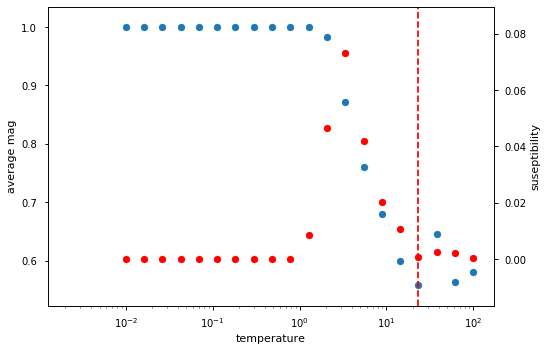

In [4]:
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
# ax.set(xlim = (0, 20))
ax.set(xscale = 'log')
fig.show()

<IPython.core.display.Javascript object>


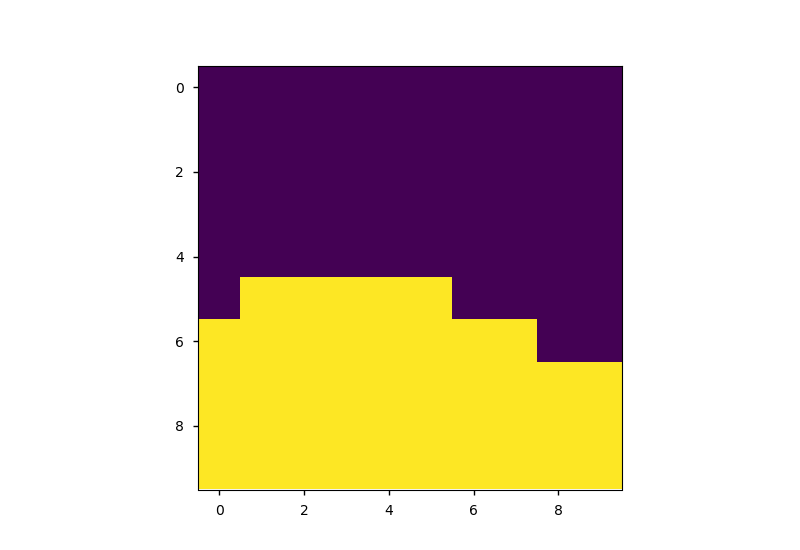

interactive(children=(IntSlider(value=0, description='time', max=9999), Output()), _dom_classes=('widget-inter…

In [5]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(10000)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()


In [4]:
m.updateState(m.sampleNodes(1)[0])

<MemoryView of 'ndarray' at 0x7fc4606d0048>